<center>

# <span style="color:#FF5733;">Analyse de Données & Prédiction de la qualité des fruits</span>
## <span style="color:#FFC300;">ECE - École d'Ingénieurs Campus Lyon</span>
### <span style="color:#FF5733;">Projet Machine Learning, A.A. 2023/2024</span>

</center>

---

**Thème du Projet:** Exploration de la Qualité des Fruits à l'aide de l'Analyse de Données

**Objectif du Projet:** Utiliser les techniques de Machine Learning pour explorer et prédire la qualité des fruits à partir de données disponibles.

**Description du Projet:**

Ce projet utilise un jeu de données sur la qualité des fruits, incluant des attributs comme la taille, le poids, la douceur, la croquabilité, etc.

**Caractéristiques Principales:**
- A_id : Identifiant unique pour chaque fruit
- Taille : Taille du fruit
- Poids : Poids du fruit
- Douceur : Degré de douceur du fruit
- Croquabilité : Texture indiquant la croquabilité du fruit
- Jus : Niveau de jus du fruit
- Maturité : Stade de maturité du fruit
- Acidité : Niveau d'acidité du fruit
- Qualité : Qualité globale du fruit

**Cas d'Utilisation Potentiels:**
- Classification des Fruits
- Prédiction de la Qualité

Les données ont été fournies par une entreprise agricole américaine et sont disponibles sur Kaggle [ici](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality).

---


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Importation des bibliothèques requises </div> 

In [105]:
import os # File system manangement
import time
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# visulisation des données
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.express as px

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Sklearn processing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.model_selection import  StratifiedShuffleSplit,ShuffleSplit,RepeatedStratifiedKFold,StratifiedKFold


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Import des bibliothèques nécessaires pour la réalisation du projet </div> 

In [106]:
# Spécifie le chemin du fichier CSV contenant les données 
Path = "/Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/apple_quality.csv"

# Charge les données à partir du fichier CSV en utilisant la bibliothèque pandas, en spécifiant le délimiteur comme la virgule.
data = pd.read_csv(Path, sep=',')

# Affiche les premières lignes du jeu de données pour obtenir un aperçu initial des données.
display(data.head())

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [107]:
# Affiche les dernieres lignes du jeu de données pour obtenir un aperçu initial des données.
display(data.tail())

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Manipulation des données </div> 

#### 1. Calcul de la Dimension du Jeu de Données

In [108]:
# Affiche le nombre de lignes et de colonnes dans le jeu de données pour donner une première vue d'ensemble.
print("Le jeu de données d'entrée comporte {} lignes et {} colonnes".format(len(data), len(data.columns)))

Le jeu de données d'entrée comporte 4001 lignes et 9 colonnes


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Conclusion :</font></h3>

* Il y a un total de **4001 enregistrements** et **9 colonnes** disponibles dans le train_dataset.


#### 2. Résumé statistique du jeu de données  
* Calcul du nombre total de valeurs manquantes et du pourcentage de valeurs manquantes.

In [109]:
# Crée un DataFrame pour donner un aperçu des données de la DataFrame originale, colonne par colonne.
def creer_apercu_dataframe(data):
    '''
    Crée un DataFrame pour donner un aperçu des données de la DataFrame originale, colonne par colonne.
    Chaque ligne résultante fournit des informations sur chaque colonne :
    - type de données
    - spécimen de données
    - nombre de valeurs uniques
    - part des valeurs manquantes
    
    Args:
        data (DataFrame): La DataFrame avec laquelle travailler.
        
    Returns:
        DataFrame résultant        
    '''
    
    cols, dtype_col, specimens, nunique, null_share = [], [], [], [], []
    for column in data:
        cols.append(column)
        
        # Obtient le type de données de la colonne
        this_dtype = data[column].dtype
        dtype_col.append(this_dtype)
        
        # Obtient un spécimen de données de la colonne
        specimen = data.loc[data[column].first_valid_index(), column]
        specimens.append(specimen)
        
        # Obtient le nombre de valeurs uniques dans la colonne
        nunique.append(data[column].nunique())
        
        # Calcule la part des valeurs manquantes dans la colonne
        null_sum = data[column].isna().sum()
        null_to_len = null_sum / len(data[column])
        null_share.append(f'{null_to_len:.2%}')
        
    # Crée un DataFrame avec les informations collectées
    df = pd.DataFrame(list(zip(dtype_col,
                               specimens,
                               nunique,
                              null_share)),
                      index=cols)    
    df.columns=['dtype',
                'specimen',
                'Total No. unique Values',
               '% of Missing Values']
 
    return df


In [110]:
creer_apercu_dataframe(data)

,dtype,specimen,Total No. unique Values,% of Missing Values
A_id,float64,0.0,4000,0.02%
Size,float64,-3.970049,4000,0.02%
Weight,float64,-2.512336,4000,0.02%
Sweetness,float64,5.34633,4000,0.02%
Crunchiness,float64,-1.012009,4000,0.02%
Juiciness,float64,1.8449,4000,0.02%
Ripeness,float64,0.32984,4000,0.02%
Acidity,object,-0.491590483,4001,0.00%
Quality,object,good,2,0.02%


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Observations sur le Jeu de Données :</font></h3>

<p align="left">
    <strong>Observation 1:</strong> Aucune des attributs ne comporte de valeurs manquantes.
</p>

<p align="left">
    <strong>Observation 2:</strong> Le jeu de données se compose de 9 colonnes, pouvant être réparties en deux groupes distincts :
</p>

1. **Colonnes de Type Catégorique :** avec un type de données object
2. **Colonnes de Type Numérique :** avec un type de données float

<p align="left">
    <strong>Observation 3:</strong> Certaines colonnes présentent un faible nombre de valeurs distinctes.
</p>
    
<p align="left">
    <strong>Observation 4:</strong> La colonne cible "Quality" contient 2 categories différentes de classe.
</p>

<p align="left">
    <strong>Observation 5:</strong> La colonne 'Acidity' a un type de données 'object' qui ne reflète pas correctement son contenu réel.
</p>

#### 4. Controle des valeur manquantes dans le dataset

In [111]:
def visualize_nan_values(dataset):
    # Calculer le nombre de valeurs NaN et leur pourcentage pour chaque colonne
    nan_counts = dataset.isnull().sum()
    total_values = len(dataset)
    nan_percentage = (nan_counts / total_values) * 100
    
    # Créer un DataFrame avec les informations sur les valeurs NaN
    nan_info = pd.DataFrame({'Column': nan_counts.index, 'NaN Count': nan_counts.values, 'NaN Percentage': nan_percentage.values})
    
    # Visualiser les informations avec Plotly Express
    fig = px.bar(nan_info, x='Column', y='NaN Count', text='NaN Count', title='Nombre de valeurs NaN par colonne',
                 labels={'NaN Count': 'Nombre de valeurs NaN', 'Column': 'Colonne'}, color='Column')
    fig.update_traces(texttemplate='%{text}', textposition='outside')
    fig.update_layout(barmode='stack')

    # Afficher le graphique des barres seulement
    return fig


In [112]:
visualize_nan_values(data)

<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Observations sur le Jeu de Données:</font></h3>

* le jeu de données présente un une valeur manquante dans tous les colonnes sauf dans la colonne Acidity, donc nous allons retiré ces lignes. 

In [113]:
def remove_rows_with_missing_values(dataset):
    # Copie du dataset original pour éviter les modifications accidentelles
    dataset_copy = dataset.copy()
    
    # Nombre de lignes avant suppression
    num_rows_before = len(dataset_copy)
    
    # Suppression des lignes avec des valeurs manquantes
    dataset_copy.dropna(inplace=True)
    
    # Nombre de lignes après suppression
    num_rows_after = len(dataset_copy)
    
    # Contrôle pour vérifier si des lignes ont été supprimées
    if num_rows_before == num_rows_after:
        print("Aucune ligne avec des valeurs manquantes n'a été supprimée.")
    else:
        print(f"{num_rows_before - num_rows_after} ligne(s) avec des valeurs manquantes ont été supprimée(s).")
    
    # Retourner le nouveau dataset
    return dataset_copy


data_clean = remove_rows_with_missing_values(data)

# Convertir le type de données de la colonne 'Acidity' en float
data_clean['Acidity'] = data_clean['Acidity'].astype(float)

# Vérifier les nouveaux types de données de chaque colonne
print(data_clean.dtypes)

1 ligne(s) avec des valeurs manquantes ont été supprimée(s).
A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object


#### 5. Vérification de la présence d'éventuels enregistrements en double.

In [114]:
def separation_doublons(data):
    # Vérifier la présence de doublons
    if data.duplicated().any():
        # Afficher le nombre de doublons
        print("Doublons dans le jeu de données : ", data.duplicated().sum())
        
        # Séparation des données en deux datasets : un sans doublons et l'autre avec tous les doublons
        data_sans_doublons = data.drop_duplicates()
        data_doublons_seuls = data[data.duplicated(keep=False)]
        
        # Calculer le pourcentage de doublons
        pourcentage_doublons = ( data.duplicated().sum() / len(data)) * 100
        
        # Afficher les informations
        print("Pourcentage de doublons : {:.2f}%".format(pourcentage_doublons))
        
        # Retourner les deux datasets
        return data_sans_doublons, data_doublons_seuls
    else:
        print("Aucun doublon dans le jeu de données.")
        return data, None

In [115]:
data_sans_doublons, data_doublons = separation_doublons(data_clean)


Aucun doublon dans le jeu de données.


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Observations sur le Jeu de Données:</font></h3>

* le jeu de données présente un pourcentage de doublons équivalent à 0.00%  

#### 5. Séparons les variables numériques et catégorielles

In [116]:
# Définition de la fonction pour séparer les variables numériques et catégorielles
def separer_variables_numeriques_et_categorielles(data):
    # Partie 1 : Séparation des variables numériques
    donnees_numeriques = data.select_dtypes(include=[np.number]).copy()
    
    # Affichage de la partie numérique
    print("Partie 1. Numérique")
    
    # Affichage du nombre de colonnes numériques
    print('Nombre de colonnes numériques :', donnees_numeriques.shape[1])
    
    # Affichage des colonnes numériques avec des points (•)
    print("Colonnes numériques : ")
    for col in donnees_numeriques.columns:
        print(f"• {col}")

    # Saut de ligne pour la clarté
    print("")

    # Partie 2 : Séparation des variables catégorielles
    donnees_categorielles = data.select_dtypes(exclude=[np.number]).copy()
    
    # Affichage de la partie catégorique
    print("Partie 2. Catégorique")
    
    # Affichage du nombre de colonnes catégoriques
    print('Nombre de colonnes catégoriques :', donnees_categorielles.shape[1])
    
    # Affichage des colonnes catégoriques avec des points (•)
    print("Colonnes catégoriques : ")
    for col in donnees_categorielles.columns:
        print(f"• {col}")

    # Retourne les deux datasets séparés
    return donnees_numeriques, donnees_categorielles

numeriques, categoriques = separer_variables_numeriques_et_categorielles(data_clean)

Partie 1. Numérique
Nombre de colonnes numériques : 8
Colonnes numériques : 
• A_id
• Size
• Weight
• Sweetness
• Crunchiness
• Juiciness
• Ripeness
• Acidity

Partie 2. Catégorique
Nombre de colonnes catégoriques : 1
Colonnes catégoriques : 
• Quality


#### 6. Réalisation d'une Analyse Descriptive

In [117]:
# Calcul des statistiques descriptives arrondies à deux décimales pour chaque colonne du DataFrame
descriptive_stats = data_clean.describe().round(2)

# Transposer les résultats pour une meilleure lisibilité
transposed_stats = descriptive_stats.T

# Affichage des statistiques descriptives arrondies
display(transposed_stats)

,count,mean,std,min,25%,50%,75%,max
A_id,4000.0,1999.50,1154.84,0.00,999.75,1999.50,2999.25,3999.00
Size,4000.0,-0.50,1.93,-7.15,-1.82,-0.51,0.81,6.41
Weight,4000.0,-0.99,1.60,-7.15,-2.01,-0.98,0.03,5.79
Sweetness,4000.0,-0.47,1.94,-6.89,-1.74,-0.50,0.80,6.37
Crunchiness,4000.0,0.99,1.40,-6.06,0.06,1.00,1.89,7.62
Juiciness,4000.0,0.51,1.93,-5.96,-0.80,0.53,1.84,7.36
Ripeness,4000.0,0.50,1.87,-5.86,-0.77,0.50,1.77,7.24
Acidity,4000.0,0.08,2.11,-7.01,-1.38,0.02,1.51,7.40


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color="brown"> 🔍 Inférence :</font></h3>

* Size minimum est de -7.15 et le poids maximum est de 6.41 donc les valeurs de cette colonne peuvent etre positive comme négative.
* Weight minimum est de -7.15 et le poids maximum est de 5.79.
* Sweetness minimum est de ?? et le poids maximum est de ??.


#### 7. Réalisation d'une Analyse Descriptive sur les Attributs Catégoriels.

In [118]:
def separer_colonnes_par_valeurs_distinctes(data, max_valeurs_distinctes):
    colonnes_liste = [x for x in list(data.columns) if x not in ['Id','JWMNP']]
    colonnes_avec_max_valeurs_distinctes = []
    colonnes_avec_plus_de_max_valeurs_distinctes = []

    for fonctionnalite in colonnes_liste:
        valeurs_distinctes = data[fonctionnalite].nunique()
        if valeurs_distinctes <= max_valeurs_distinctes:
            colonnes_avec_max_valeurs_distinctes.append((fonctionnalite, valeurs_distinctes))
        else:
            colonnes_avec_plus_de_max_valeurs_distinctes.append((fonctionnalite, valeurs_distinctes))

    return colonnes_avec_max_valeurs_distinctes, colonnes_avec_plus_de_max_valeurs_distinctes

# Exemple d'utilisation : séparer les colonnes avec un maximum de 15 valeurs distinctes
max_valeurs_distinctes = 15
colonnes_avec_max_valeurs_distinctes, colonnes_avec_plus_de_max_valeurs_distinctes = separer_colonnes_par_valeurs_distinctes(data_clean, max_valeurs_distinctes)

# Afficher les résultats
print(f"Colonnes avec moins de {max_valeurs_distinctes} valeurs distinctes :")
for col, num_unique in colonnes_avec_max_valeurs_distinctes:
    print(f"{col} ({num_unique} valeurs distinctes)")

print("\nColonnes avec plus de 15 valeurs distinctes :")
for col, num_unique in colonnes_avec_plus_de_max_valeurs_distinctes:
    print(f"{col} ({num_unique} valeurs distinctes)")


Colonnes avec moins de 15 valeurs distinctes :
Quality (2 valeurs distinctes)

Colonnes avec plus de 15 valeurs distinctes :
A_id (4000 valeurs distinctes)
Size (4000 valeurs distinctes)
Weight (4000 valeurs distinctes)
Sweetness (4000 valeurs distinctes)
Crunchiness (4000 valeurs distinctes)
Juiciness (4000 valeurs distinctes)
Ripeness (4000 valeurs distinctes)
Acidity (4000 valeurs distinctes)


#### 8. Analyse des Valeurs Uniques de Attribut Catégoriel Quality.

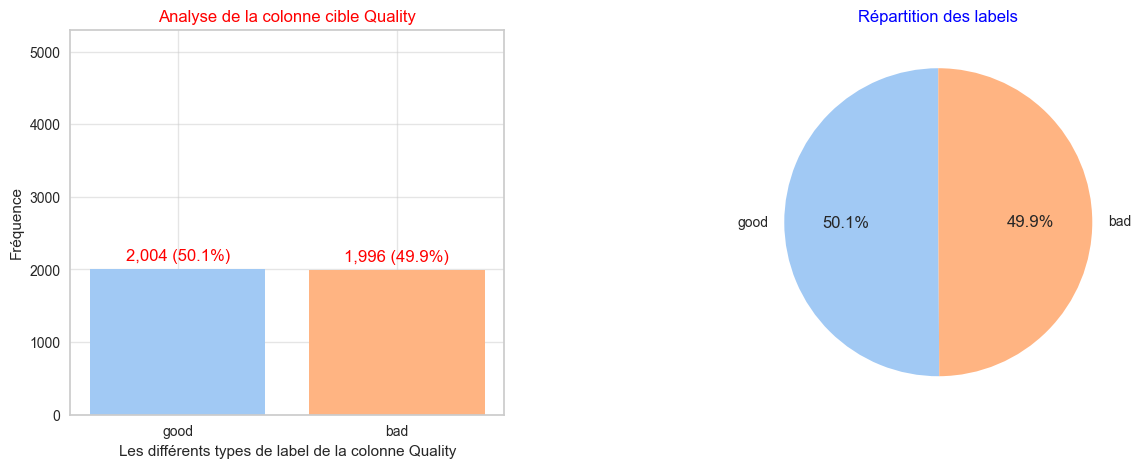

In [119]:
counts = data_clean.Quality.value_counts()
# Créer une figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Premier sous-graphique : bar chart
ax1.bar(counts.index, counts.values, color=sns.color_palette("pastel"))

# Formater le nombre avec des virgules et l'afficher au-dessus des barres
for bar in ax1.patches:
    hauteur = bar.get_height()
    pourcentage = (hauteur / len(data_clean)) * 100  # Calcul du pourcentage
    ax1.text(bar.get_x() + bar.get_width()/2, hauteur + 80, f"{hauteur:,.0f} ({pourcentage:.1f}%)", ha='center', va='bottom', color='red')

ax1.set_xlabel('Les différents types de label de la colonne Quality')
ax1.set_ylabel('Fréquence')
ax1.set_title('Analyse de la colonne cible Quality', color='red')

# Afficher à la fois les lignes de grille horizontales et verticales
ax1.grid(axis='both', linestyle='-', alpha=0.5)
ax1.set_ylim(0, 5300)

# Deuxième sous-graphique : pie chart
ax2.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))

ax2.set_title('Répartition des labels', color='blue')

# Ajustement de l'espacement entre les deux sous-graphiques
plt.subplots_adjust(wspace=0.5)

plt.show()


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color="brown"> 🔍 Inférence :</font></h3>

* La colonne cible **Quality** présente deux types de labels : **good** et **bad**.
* On observe une légère déséquilibre dans la répartition de chaque label au sein de la colonne cible.


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman ; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Analyse exploratoire des données (EDA) </div> 

#### 1. Visualisation de la distribution de chaque classe de NObeyesdad.

In [120]:
background_color = '#CCFF80'
color_palette=['#2769FE', '#FF5F57', '#4dad82', '#230F88', '#0E0330']


numerical_features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']
target = ['Quality']

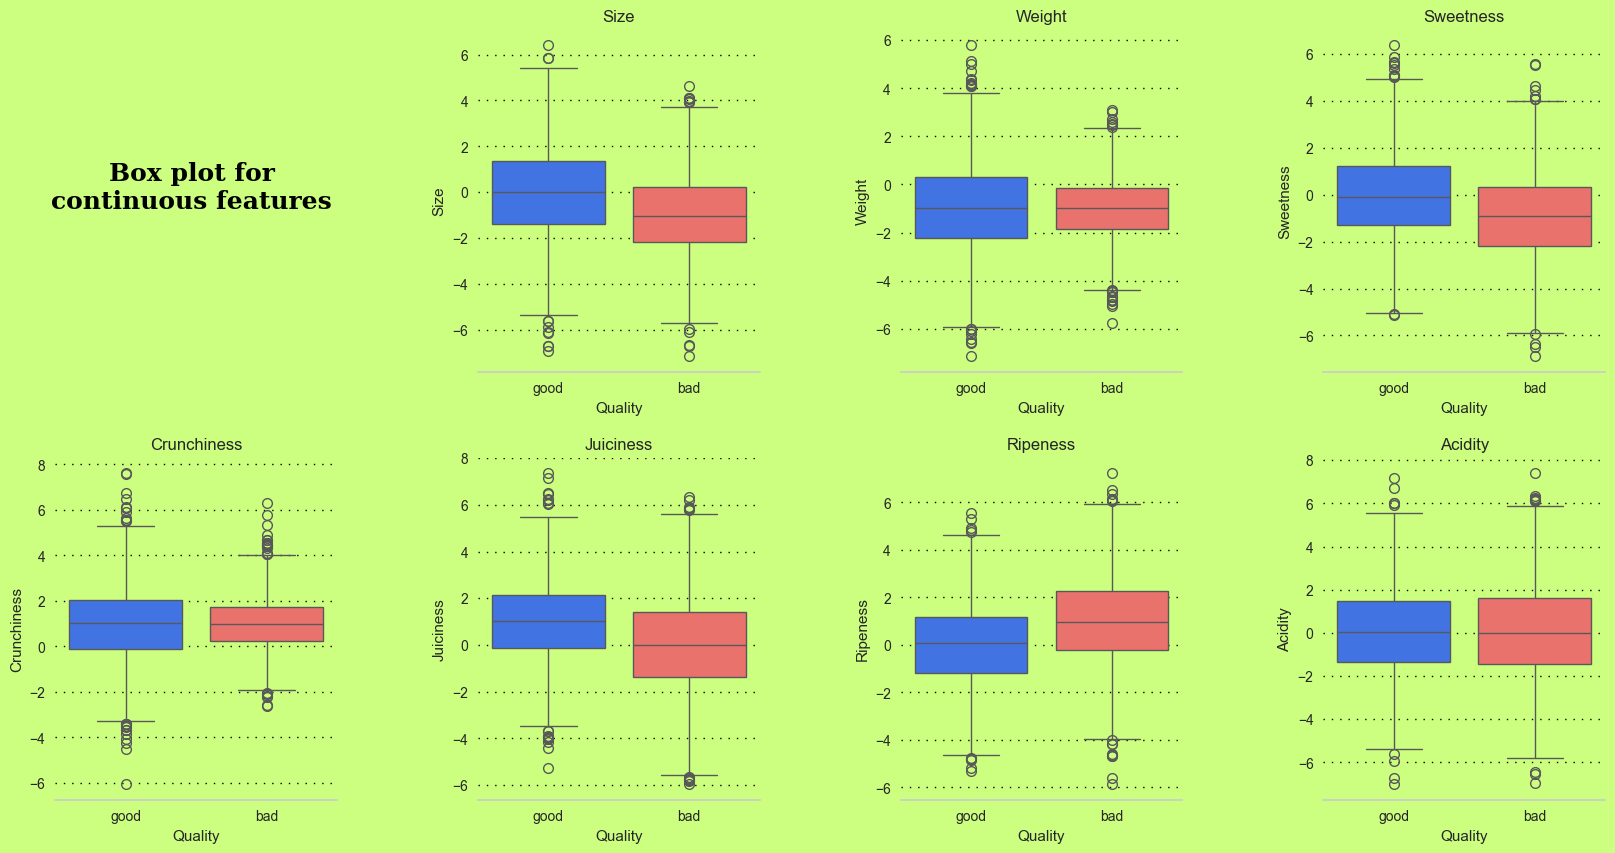

In [121]:
fig = plt.figure(figsize=(20, 10))
fig.patch.set_facecolor(background_color) 
gs = fig.add_gridspec(2, 4)
gs.update(wspace=0.5, hspace=0.25)
axes = [fig.add_subplot(gs[i//4, i%4]) for i in range(1, 8)]

ax_title = fig.add_subplot(gs[0, 0])
ax_title.text(0.5, 0.5, 'Box plot for \ncontinuous features \n',
              horizontalalignment='center', verticalalignment='center',
              fontsize=18, fontweight='bold', fontfamily='serif', color="#000000")
ax_title.set_xticks([])
ax_title.set_yticks([])
ax_title.set_facecolor(background_color)
for spine in ax_title.spines.values():
    spine.set_visible(False)

for ax, feature in zip(axes, numerical_features):
    sns.boxplot(x='Quality', y=feature, data=data_clean, ax=ax, palette=color_palette)
    ax.set_title(feature)
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    ax.set_facecolor(background_color)
    for s in ["top","right","left"]:
        ax.spines[s].set_visible(False)

plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Conclusion:</font></h3>

* Toutes les colonnes de type numerique presentent des valeurs aberantes.

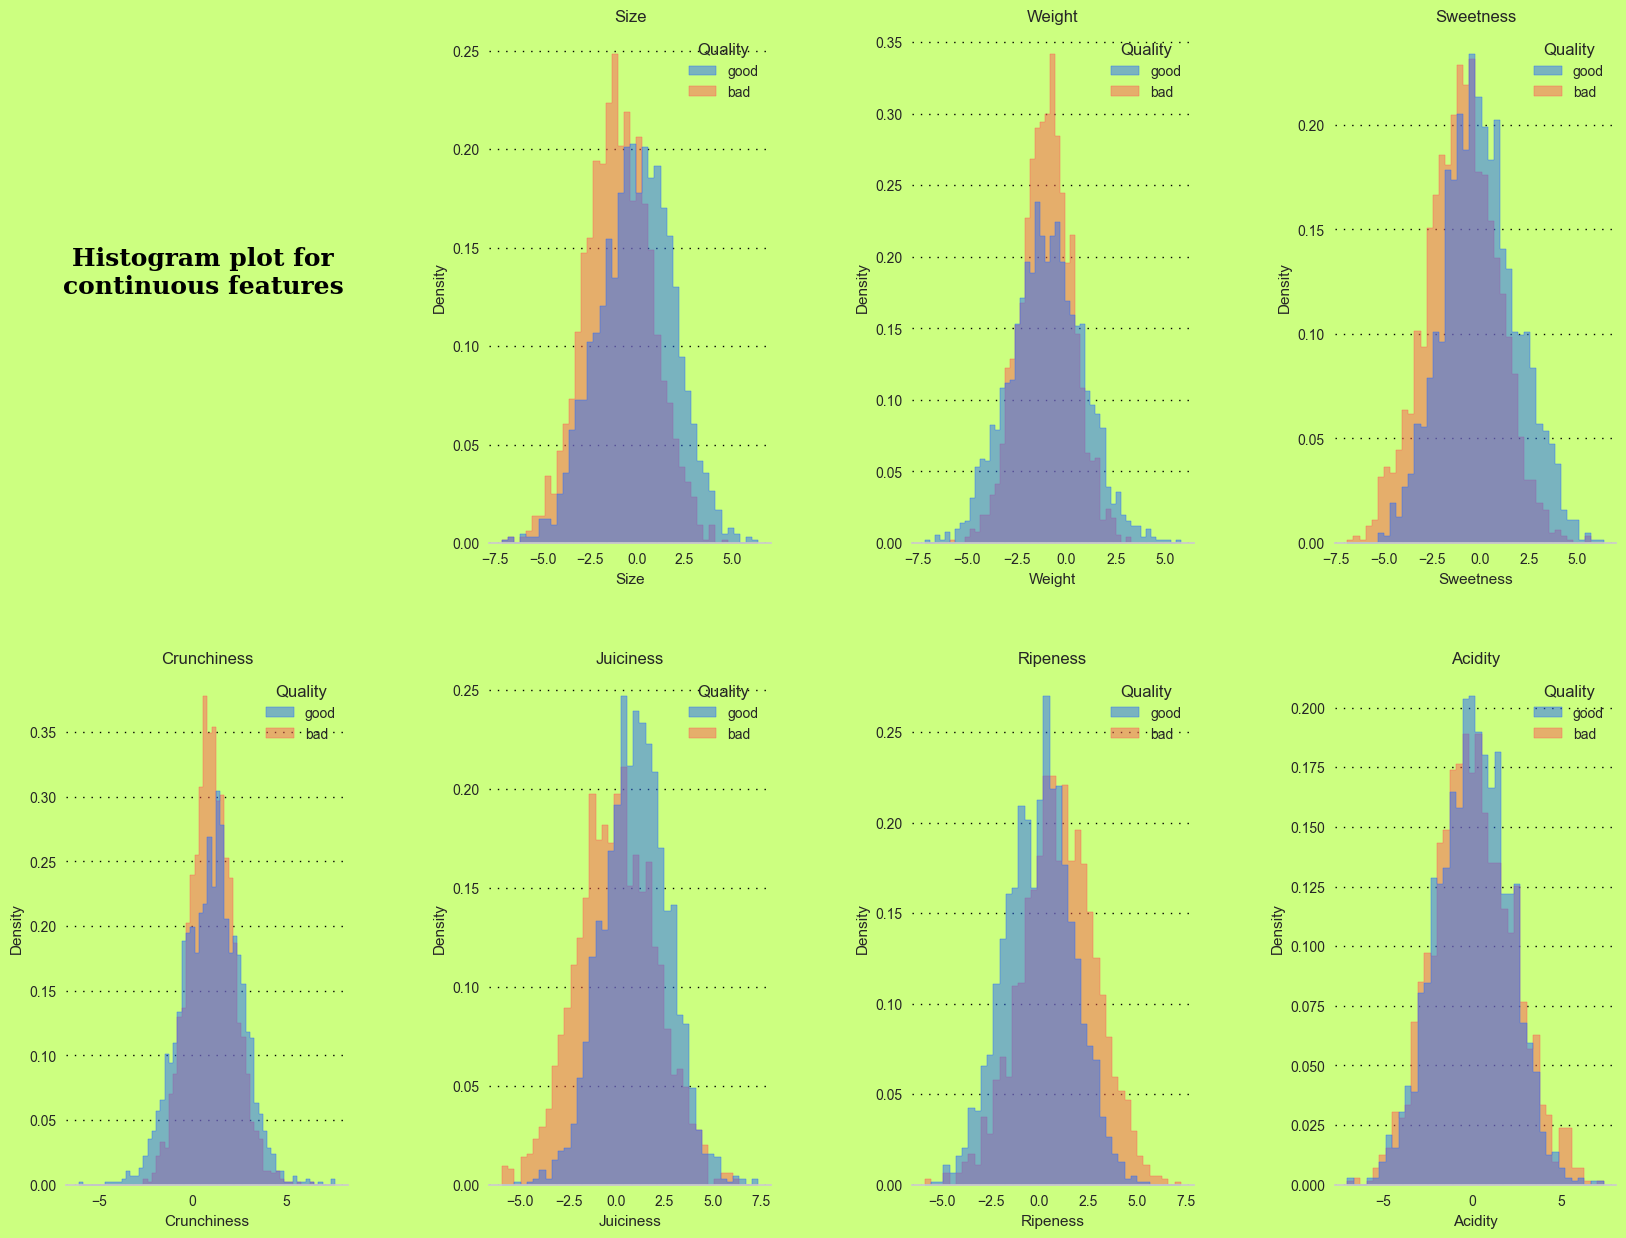

In [122]:
fig = plt.figure(figsize=(20, 15))
fig.patch.set_facecolor(background_color) 
gs = fig.add_gridspec(2, 4)
gs.update(wspace=0.5, hspace=0.25)
axes = [fig.add_subplot(gs[i//4, i%4]) for i in range(1, 8)]

ax_title = fig.add_subplot(gs[0, 0])
ax_title.text(0.5, 0.5, 'Histogram plot for \ncontinuous features \n',
              horizontalalignment='center', verticalalignment='center',
              fontsize=18, fontweight='bold', fontfamily='serif', color="#000000")
ax_title.set_xticks([])
ax_title.set_yticks([])
ax_title.set_facecolor(background_color)
for spine in ax_title.spines.values():
    spine.set_visible(False)

for ax, feature in zip(axes, numerical_features):
    sns.histplot(data=data_clean, x=feature, hue='Quality', element="step", stat="density", common_norm=False, ax=ax, palette=color_palette, alpha=0.5)
    ax.set_title(feature)
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    ax.xaxis.grid(False)
    ax.set_facecolor(background_color)
    for s in ["top","right","left"]:
        ax.spines[s].set_visible(False)


plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Conclusion:</font></h3>

* Toutes les colonnes de type numerique presentent une distribution presque normal.


#### 2.  Détection et Traitement des Valeurs Aberrantes

In [123]:
def get_iqr_values_Specifying_quartile(df_in, col_name,first_quartile,third_quartile):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(first_quartile) # xth percentile / 1st quartile
    q3 = df_in[col_name].quantile(third_quartile) # yth percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-(1.5*iqr) # The minimum value or the |- marker in the box plot
    maximum = q3+(1.5*iqr) # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def count_outliers_Specifying_quartile(df_in, col_name, first_quartile, third_quartile):
    _, _, _, _, minimum, maximum = get_iqr_values_Specifying_quartile(df_in, col_name, first_quartile, third_quartile)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def detect_and_count_outliers(df_in, list_des_colonnes, first_quartile, third_quartile):
    result_data = []
    for col_name in list_des_colonnes:
        outlier_count = count_outliers_Specifying_quartile(df_in, col_name, first_quartile, third_quartile)
        total_count = len(df_in)
        outlier_percentage = round((outlier_count / total_count) * 100,2)
        result_data.append([col_name, outlier_count, outlier_percentage])
    
    result_df = pd.DataFrame(result_data, columns=['Column Name', 'Number of Outliers', 'Percentage of Outliers(%)'])
    return result_df

def visualize_outliers(df):
    fig = px.bar(df, x='Column Name', y='Number of Outliers',
                 labels={'Column Name': 'Nom de la colonne', 'Number of Outliers': 'Nombre de valeurs aberrantes'},
                 title='Nombre de valeurs aberrantes par colonne')
    fig.show()

In [124]:
first_quartile, third_quartile = 0.25, 0.75
df_outliers_info = detect_and_count_outliers(data_clean, numerical_features, first_quartile, third_quartile)
display(df_outliers_info)
# visualize_outliers(df_outliers_info)

,Column Name,Number of Outliers,Percentage of Outliers(%)
0,Size,22,0.55
1,Weight,54,1.35
2,Sweetness,32,0.80
3,Crunchiness,47,1.18
4,Juiciness,32,0.80
5,Ripeness,24,0.60
6,Acidity,20,0.50


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Conclusion:</font></h3>
    
* L'analyse des valeurs aberrantes dans nos données numériques montre qu'elles sont présentes dans toutes les colonnes, bien que leur fréquence ne soit pas très élevée.

## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Correlation Matrix </div> 

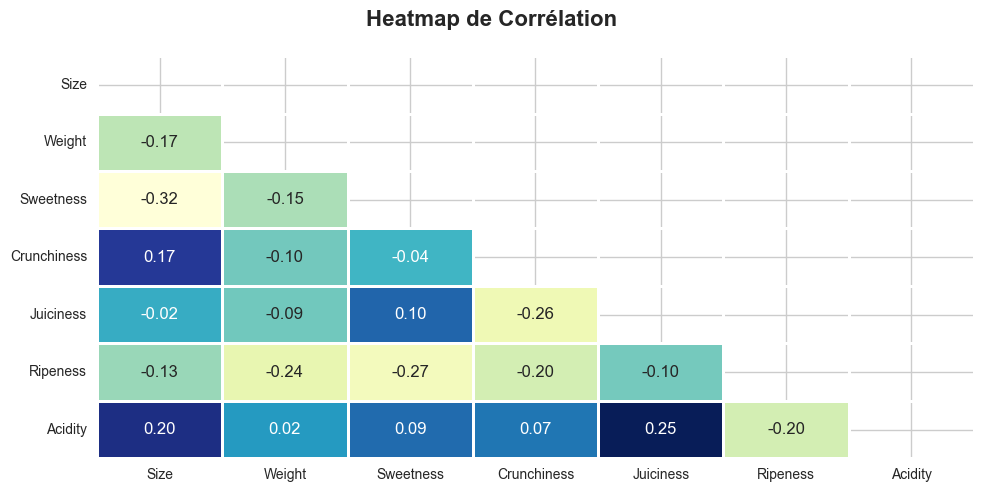

In [125]:
corr = data_clean[numerical_features].corr(method='pearson')
mask = np.triu(np.ones_like(corr))
fig = plt.subplots(figsize=(10,5))
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask, cmap='YlGnBu', cbar=None, linewidth=1)
plt.suptitle('Heatmap de Corrélation', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Conclusion:</font></h3>

* Aucune des colonnes numériques ne présente de corrélation significative entre elles, ce qui pourrait entraîner des erreurs lors de la phase d'entraînement du modèle de classification.

## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman ; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Split dataset in train et test set </div> 

<div style="text-align:center">
  <div style="float:right; margin-left: 20px;">
    <img src="4_train-test-split.jpg" alt="Gas Turbine" width="1100" height="400">
  </div>
</div>

In [126]:
def split_data(X, y, threshold_test=0.2, random_state=200):
    """
    Divise les données en ensembles d'entraînement et de test.

    Paramètres :
    - X : Features du jeu de données.
    - y : Valeurs cibles du jeu de données.
    - threshold_test : Taille du jeu de données de test (par défaut : 0.2).
    - random_state : Seed pour la reproductibilité (par défaut : 200).

    Retourne :
    - X_train : Features du jeu de données d'entraînement.
    - X_test : Features du jeu de données de test.
    - y_train : Valeurs cibles du jeu de données d'entraînement.
    - y_test : Valeurs cibles du jeu de données de test.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=threshold_test, stratify=y, shuffle=True, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [127]:
def print_dataset_info(X_train, X_test, y_train, y_test):
    """
    Imprime des informations sur les dimensions et les classes des ensembles de données d'entrée.

    Paramètres :
    - X_train, X_test : Matrices de caractéristiques pour l'entraînement et le test.
    - y_train, y_test : Vecteurs cibles pour l'entraînement et le test.
    """
    # Imprime les dimensions de X_train, X_test, y_train et y_test
    print("")
    print(f"Dimensions de X_train : {X_train.shape}")
    print(f"Dimensions de X_test  : {X_test.shape}")
    print(f"Dimensions de y_train : {y_train.shape}")
    print(f"Dimensions de y_test  : {y_test.shape}")
    print("")

    # Imprime le nombre de classes uniques dans y_train et y_test
    num_classes_train = len(np.unique(y_train))
    num_classes_test = len(np.unique(y_test))
    print(f"Nombre de classes uniques dans y_train : {num_classes_train}")
    print(f"Nombre de classes uniques dans y_test : {num_classes_test}")
    print("")

    # Imprime le nombre d'instances par classe dans y_train et y_test
    for class_label in np.unique(y_train):
        instances_train = np.sum(y_train.values == class_label)
        instances_test = np.sum(y_test.values == class_label)
        print(f"Classe {class_label}: Instances d'entraînement - {instances_train}, Instances de test - {instances_test}") 

In [128]:
X, y = data_clean[numerical_features], data_clean[target]
# Utilisation de la fonction pour diviser les données et afficher les informations
X_train, X_test, y_train, y_test = split_data(X, y, threshold_test=0.2, random_state=200)
print_dataset_info(X_train, X_test, y_train, y_test)


Dimensions de X_train : (3200, 7)
Dimensions de X_test  : (800, 7)
Dimensions de y_train : (3200, 1)
Dimensions de y_test  : (800, 1)

Nombre de classes uniques dans y_train : 2
Nombre de classes uniques dans y_test : 2

Classe bad: Instances d'entraînement - 1597, Instances de test - 399
Classe good: Instances d'entraînement - 1603, Instances de test - 401


In [129]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

def encode_labels(y_train, y_test):
    # Initialiser un objet LabelEncoder
    label_encoder = LabelEncoder()

    # Adapter l'encodeur aux étiquettes d'entraînement et encoder les étiquettes
    labels_encoded_train = label_encoder.fit_transform(y_train)
    labels_encoded_test = label_encoder.transform(y_test)

    return labels_encoded_train, labels_encoded_test, label_encoder

def decode_labels(label_encoder, labels_encoded):
    # Utiliser l'objet LabelEncoder pour décoder les étiquettes
    labels_decoded = label_encoder.inverse_transform(labels_encoded)
    return labels_decoded


In [130]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

def evaluate_model(nn_model, X_test, labels_encoded_test, label_encoder):
    # Prédictions sur les données de test
    y_predicted = np.argmax(nn_model.predict(X_test), axis=-1)

    # Décodage des labels prédits et vrais labels
    y_pred = decode_labels(label_encoder, y_predicted)
    y_true = decode_labels(label_encoder, labels_encoded_test)

    # Rapport de classification
    print("Rapport de classification :\n", classification_report(y_true, y_pred))

    # Calcul du score F1_macro
    F1_macro = f1_score(y_true, y_pred, average='macro')
    print(f"Score F1_macro (comportement du modèle avec de nouvelles données) : {F1_macro}")

    # Matrice de confusion
    cf_matrix = confusion_matrix(y_true, y_pred)
    categories = np.unique(y_true)  # Nombre de classes uniques dans les vrais labels
    group_names = ['Vrai Négatif', 'Faux Positif', 'Faux Négatif', 'Vrai Positif']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(len(categories), len(categories))

    # Affichage de la matrice de confusion avec seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=categories, yticklabels=categories)
    plt.xlabel("Valeurs prédites")
    plt.ylabel("Valeurs réelles")
    plt.title("Matrice de Confusion")
    plt.show()


## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Construire un modèle de Machine Learning pour notre problème de classification. </div>

In [131]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

# for model evaluation
import time
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import ShuffleSplit,cross_val_score,train_test_split
from sklearn.model_selection import StratifiedKFold,StratifiedShuffleSplit, KFold ,RepeatedKFold, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# sklearn Algoritm of Machine Learning algorithms
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

<div class="content-section">
    <div class="header2">1.1 | K-Nearest Neighbour (KNN)</div>
    <div class="explain-box knn-box">
        <blockquote>
            <mark><b>The k-nearest neighbors (KNN)</b></mark> est un algorithme de classification de données <b>qui estime la probabilité qu'un point de données devienne membre d'un groupe ou d'un autre</b> en fonction du groupe auquel appartiennent les points de données les plus proches. L'algorithme des k plus proches voisins est un type d'algorithme d'apprentissage supervisé utilisé <b>pour résoudre des problèmes de classification et de régression</b>.<br><br>
            Il est appelé un <b>algorithme d'apprentissage paresseux ou apprenant paresseux</b> car il ne réalise aucun apprentissage lors de la fourniture des données d'entraînement. Au lieu de cela, il stocke simplement les données pendant la période d'entraînement et ne réalise aucun calcul. Il ne construit pas de modèle tant qu'une requête n'est pas effectuée sur l'ensemble de données. Cela rend le KNN idéal pour l'exploration de données.<br><br>
        </blockquote>
    </div>
    <div class="images">
        <img src="https://1.bp.blogspot.com/-D6REhf2XBwQ/XZcWn0cwSEI/AAAAAAAAAvs/LUCN8jxvzcMjkkDK4FAXSuR7MBDW8SBJgCLcBGAsYHQ/s1600/KNN_final_a1mrv9.jpg" alt="KNN" width="40%">
        <!-- Ajoutez ici une description ou une légende pour l'image -->
        <i>🖼 KNN by Kita Informatika</i>
    </div>
</div>

<div class="content-section">
    <div class="header2">1.2 | Logistic Regression</div>
    <div class="explain-box logistic-box">
        <blockquote>
            <mark><b>Logistic regression</b></mark> est une méthode statistique utilisée pour construire des modèles d'apprentissage automatique où <b>la variable dépendante est dichotomique : c'est-à-dire binaire</b>. La régression logistique est utilisée pour décrire les données et <b>la relation entre une variable dépendante et une ou plusieurs variables indépendantes</b>. Les variables indépendantes peuvent être nominales, ordinales ou de type intervalle.<br><br>
            Le nom "régression logistique" est dérivé du concept de la fonction logistique qu'elle utilise. <b>La fonction logistique est également connue sous le nom de fonction sigmoïde</b>. La valeur de cette fonction logistique se situe entre zéro et un.<br><br>
        </blockquote>
    </div>
    <div class="images">
        <img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/years-2.JPG" alt="Logistic Regression" width="40%">
        <!-- Ajoutez ici une description ou une légende pour l'image -->
        <i>🖼 Logistic Function by Simplilearn</i>
    </div>
</div>


##### Fonction Baseline Model Building 

In [132]:
import time
def initialize_multi_label_classifiers():
    """
    Initializes a list of classifiers for multi-label classification.

    Returns:
    Dictionary of initialized classifiers with model names as keys.
    """
    classifiers = {
        "Extra Trees": ExtraTreesClassifier(n_jobs=-1),
        "Random Forest": RandomForestClassifier(n_jobs=-1),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Logistic Regression": LogisticRegression(),
        "Linear SVC": LinearSVC(),
        "Ridge Classifier": RidgeClassifier(),
        "SVC": SVC(kernel='linear'),
        "XGBoost":XGBClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        #"CatBoost": CatBoostClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        #"LGBM": LGBMClassifier()
    }
    return classifiers

def Train_and_Evaluate_models(model, X_train, y_train, X_test, y_test):
    print(f"Entraînement du modèle avec {type(model).__name__}")

    start_time = time.time()  # Temps de début de l'entraînement time.time()

    # Entraînement du modèle
    model.fit(X_train, y_train)

    end_time = time.time()  # Temps de fin de l'entraînement
    training_time = end_time - start_time  # Temps écoulé pour l'entraînement

    print(f"Temps d'entraînement : {training_time:.2f} secondes")

    # Prédiction des valeurs pour le jeu de données de test
    y_pred = model.predict(X_test)

    # Calcul des différentes métriques
    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    # Création du dictionnaire contenant les différentes métriques
    #name_model = type(model).__name__
    metrics_dict = {'Accuracy': accuracy,'F1_macro': f1_macro,'training_time':training_time}

    return metrics_dict

In [133]:
def visualize_metric_results(df_results, metric):
    # Sort DataFrame by the specified metric
    sorted_df = df_results.sort_values(by=metric, ascending=False)

    # Use a color palette from plotly express for different models
    colors = px.colors.qualitative.Plotly[:len(sorted_df)]

    # Create the plot
    fig = px.bar(sorted_df, x=sorted_df.index, y=metric, color=sorted_df.index, color_discrete_sequence=colors)

    # Update layout
    fig.update_layout(
        title=f'Results sorted by {metric}',
        xaxis_title='Model',
        yaxis_title=metric
    )

    # Show the plot
    fig.show()


from sklearn.preprocessing import LabelEncoder

def encoder_labels(y_train, y_test):
    """
    Encodage des labels à l'aide de LabelEncoder.

    Args:
    - y_train : Series, tableau des labels de l'ensemble d'entraînement.
    - y_test : Series, tableau des labels de l'ensemble de test.

    Returns:
    - y_train_encoded : NumPy array, labels encodés de l'ensemble d'entraînement.
    - y_test_encoded : NumPy array, labels encodés de l'ensemble de test.
    - label_encoder : LabelEncoder, objet LabelEncoder entraîné sur les données d'entraînement.
    """
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)
    
    return y_train_encoded, y_test_encoded, label_encoder

def decoder_labels(y_encoded, label_encoder):
    """
    Décodage des labels à l'aide d'un LabelEncoder.

    Args:
    - y_encoded : NumPy array, labels encodés à décoder.
    - label_encoder : LabelEncoder, objet LabelEncoder entraîné.

    Returns:
    - y_decoded : NumPy array, labels décodés.
    """
    y_decoded = label_encoder.inverse_transform(y_encoded)
    
    return y_decoded



## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Accuracy of Classifiers base models for Data  (X_train, y_train) </div>

In [134]:
# Initialisation des classificateurs
classifiers = initialize_multi_label_classifiers()

# Encodage des labels et récupération de l'objet LabelEncoder
y_train_encoded, y_test_encoded, label_encoder = encoder_labels(y_train, y_test)

# Affichage des résultats
print("Labels encodés de l'ensemble d'entraînement :", y_train_encoded)
print("Labels encodés de l'ensemble de test :", y_test_encoded[:9])

# Décodage des labels de l'ensemble de test
#y_test_decoded = decoder_labels(y_test_encoded, label_encoder)
#print("Labels décodés de l'ensemble de test :", y_test_decoded)

# Initialisation du dictionnaire pour stocker les résultats
results = {}

# Boucle sur les classificateurs
for name_model, model in classifiers.items():
    # Affichage du nom du modèle
    print("--------------------------------------------------------------------")
    print("Train model:", name_model)

    # Évaluation du modèle et stockage du résultat dans le dictionnaire
    #results[name_model]  = Train_and_Evaluate_models(model, X_train, y_train, X_test, y_test)
    results[name_model]  = Train_and_Evaluate_models(model, X_train, y_train_encoded, X_test, y_test_encoded) 
    print("\n")


Labels encodés de l'ensemble d'entraînement : [1 1 1 ... 1 0 0]
Labels encodés de l'ensemble de test : [1 0 0 1 1 1 1 0 1]
--------------------------------------------------------------------
Train model: Extra Trees
Entraînement du modèle avec ExtraTreesClassifier
Temps d'entraînement : 0.18 secondes


--------------------------------------------------------------------
Train model: Random Forest
Entraînement du modèle avec RandomForestClassifier
Temps d'entraînement : 0.26 secondes


--------------------------------------------------------------------
Train model: K-Nearest Neighbors
Entraînement du modèle avec KNeighborsClassifier
Temps d'entraînement : 0.01 secondes


--------------------------------------------------------------------
Train model: Logistic Regression
Entraînement du modèle avec LogisticRegression
Temps d'entraînement : 0.04 secondes


--------------------------------------------------------------------
Train model: Linear SVC
Entraînement du modèle avec LinearSVC


In [135]:
# Transformer le dictionnaire en DataFrame
df_results = pd.DataFrame(results).T  # .T pour transposer les lignes et colonnes

# Afficher le DataFrame
display(df_results)

# Test de la fonction avec 'Accuracy'
visualize_metric_results(df_results, 'Accuracy')

,Accuracy,F1_macro,training_time
Extra Trees,0.87500,0.874972,0.182940
Random Forest,0.87375,0.873750,0.256013
K-Nearest Neighbors,0.88500,0.884988,0.005882
Logistic Regression,0.75375,0.753546,0.036152
Linear SVC,0.75500,0.754815,0.236726
Ridge Classifier,0.75500,0.754815,0.012705
SVC,0.75375,0.753663,0.394020
XGBoost,0.88000,0.880000,0.133568
Decision Tree,0.80625,0.806213,0.042319
Gradient Boosting,0.84750,0.847499,1.081677


## Interprétation des Meilleurs Modèles

### Extra Trees
- **Précision (Accuracy)** : 87.9%
- **F1 Macro** : 87.9%
- **Temps d'Entraînement** : 0.174639

L'Extra Trees Classifier a démontré une précision élevée de 87.9%, ce qui signifie qu'il a correctement classé 87.9% des échantillons dans l'ensemble de test. Le F1 Macro score est également élevé à 87.9%, indiquant une bonne balance entre précision et rappel pour toutes les classes. Le temps d'entraînement de 0.174639 indique que le modèle s'entraîne rapidement.

### K-Nearest Neighbors (KNN)
- **Précision (Accuracy)** : 88.9%
- **F1 Macro** : 88.9%
- **Temps d'Entraînement** : 0.006815

Le K-Nearest Neighbors (KNN) a atteint une précision de 88.9%, ce qui est légèrement supérieur à l'Extra Trees. Cependant, son temps d'entraînement est extrêmement faible à seulement 0.006815, ce qui en fait un choix attrayant pour les problèmes nécessitant une mise en œuvre rapide.

### XGBoost
- **Précision (Accuracy)** : 88.6%
- **F1 Macro** : 88.6%
- **Temps d'Entraînement** : 0.205425

XGBoost présente une précision de 88.6%, légèrement inférieure à celle de KNN mais toujours très élevée. Son temps d'entraînement est légèrement plus élevé que celui de l'Extra Trees mais reste raisonnable à 0.205425.

Ces trois modèles se distinguent par leur précision élevée et leur bon équilibre entre précision et temps d'entraînement. Ils pourraient être des choix solides pour la classification des données, en fonction des exigences spécifiques du projet et des contraintes de temps.


## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Accuracy of K-Nearest Neighbors for Unscaled Data & Scaled Data </div>

In [136]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
def train_and_evaluate_with_scaling(X_train, X_test, y_train, y_test, classifier, scaler_names):
    # Initialisation des résultats
    results = {}
    
    # Entraînement du modèle sans mise à l'échelle
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results['Without Scaling'] = accuracy
    
    # Entraînement du modèle avec chaque scaler
    for scaler_name in scaler_names:
        scaler = None
        if scaler_name == 'StandardScaler':
            scaler = StandardScaler()
        elif scaler_name == 'MinMaxScaler':
            scaler = MinMaxScaler()
        elif scaler_name == 'RobustScaler':
            scaler = RobustScaler()
        else:
            raise ValueError(f"Scaler '{scaler_name}' not supported.")
        
        # Mise à l'échelle des données
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Entraînement du modèle avec les données mises à l'échelle
        classifier.fit(X_train_scaled, y_train)
        y_pred_scaled = classifier.predict(X_test_scaled)
        accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
        results[scaler_name] = accuracy_scaled
    
    # Visualisation des résultats
    plt.figure(figsize=(15, 8))
    plt.bar(results.keys(), results.values(), color='skyblue')
    plt.xlabel('Scaler')
    plt.ylabel('Accuracy')
    plt.title('\n\nAccuracy of Different Scalers')
    for i, value in enumerate(results.values()):
        plt.text(i, value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=10)  # Ajustement de la position verticale du texte
    plt.ylim(0, 1)
    plt.tight_layout()  # Ajustement de l'espacement entre les barres et les bords du graphique
    plt.show()

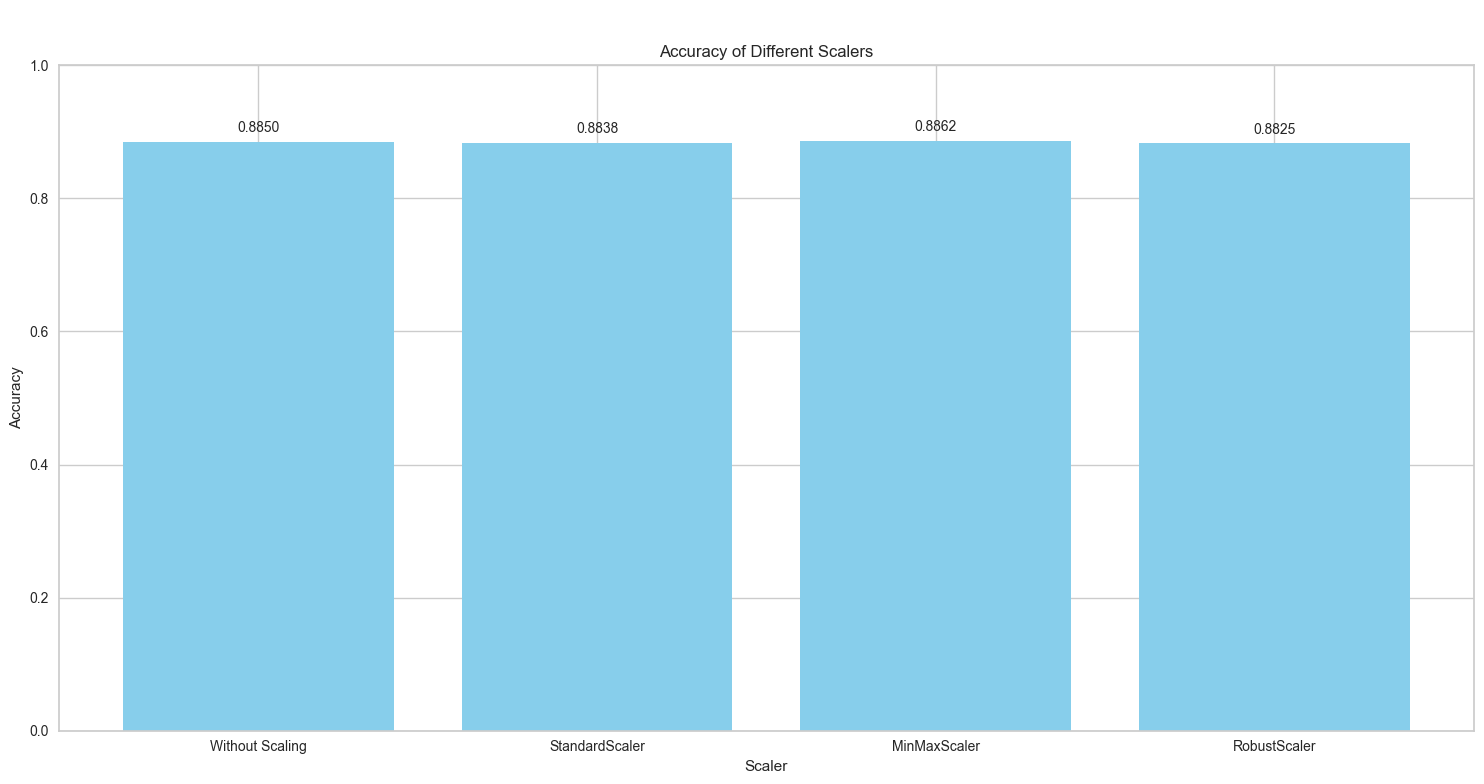

In [137]:
model = KNeighborsClassifier()
scalers = ['StandardScaler', 'MinMaxScaler', 'RobustScaler']
train_and_evaluate_with_scaling(X_train, X_test, y_train, y_test, model, scalers)

<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">
<h3 align="left"><font color=brown> 🔍 Conclusion :</font></h3>
    <p>
        L'analyse de l'accuracy en fonction des différents modèles de scaling nous montre que :
        <ul>
            <li>L'accuracy des données non mises à l'échelle est nettement meilleure que les trois méthodes de scaling. Cependant, cette différence, bien que visible, reste toutefois très légère.</li>
        </ul>
    </p>
</div>


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">Graphiques de Variance Expliquée par l'Analyse en Composantes Principales </div> 

### 1.1 - Comment choisir la meilleur valeur de du nombre de componenet pour le pca ?

In [138]:
def plot_pca_explained_variance(data, numerical_columns):
    # Extract numerical features and target variable
    X_data = data[numerical_columns].copy()

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_data)

    # Perform PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    # Calculate the explained variance
    explained_variance = pca.explained_variance_

    # Create a 2x1 grid of subplots
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

    # Plot the explained variance in the first subplot
    bars = ax1.bar(range(1, len(explained_variance) + 1), explained_variance)
    ax1.set_xlabel("Principal Component")
    ax1.set_ylabel("Explained Variance")
    ax1.set_title("Explained Variance by Principal Component")

    # Adding labels with values on the bars
    for bar, value in zip(bars, explained_variance):
        height = bar.get_height()
        ax1.annotate(f'{value:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords='offset points',
                     ha='center', va='bottom')

    # Calculate the cumulative explained variance
    cumulative_explained_variance = np.cumsum(explained_variance)

    # Plot the cumulative explained variance in the second subplot
    ax2.plot(
        range(1, len(cumulative_explained_variance) + 1),
        cumulative_explained_variance,
        marker="o",
    )
    ax2.set_xlabel("Number of Principal Components")
    ax2.set_ylabel("Cumulative Explained Variance")
    ax2.set_title("Cumulative Explained Variance by Principal Components")

    # Display the figure
    plt.tight_layout()
    plt.show()


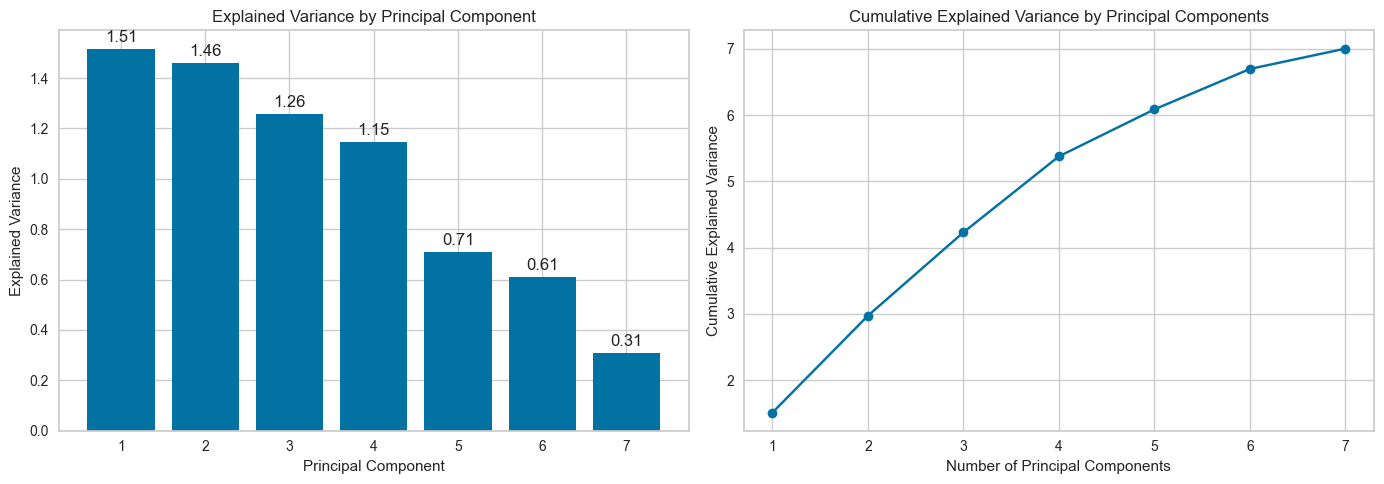

In [139]:
plot_pca_explained_variance(data_clean, numerical_features)

<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">
<h3 align="left"><font color=brown> 🔍 Conclusion :</font></h3>
    <p>
        L'analyse de graphiques de Variance Expliquée par l'Analyse en Composantes Principales PCA nous montre que :
        <ul>
            <li> On peut voir que la variance expliquée par les premier et deuxième composants principaux est d'environ 15% et 14% respectivement. Nous pouvons maintenant calculer la variance cumulative expliquée par ceux-ci. Pour plus de facilité d'observation, nous convertissons les chiffres en pourcentages ici.</li>
            <li>  Le graphique indique que le seuil de 70% est atteint au PC = 7. Idéalement, nous pouvons garder 4 (ou au maximum 5) composants ici. Avant PC = 5, le graphique suit une tendance à la hausse.</li>
        </ul>
    </p>
</div>

### 1.2 - Comment varie l'accuracy score en fonction en n_components composantes principales (PCA)

In [140]:
def apply_pca(X, new_dimension=2):
    """
    Applique l'analyse en composantes principales (PCA) à un ensemble de données.

    :param X: DataFrame, l'ensemble de données
    :param new_dimension: int, la nouvelle dimension souhaitée après PCA
    :return: DataFrame, le DataFrame transformé par PCA
    """
    # Étape 1: Standardisation des données
    std = StandardScaler()
    transformed = std.fit_transform(X)

    # Étape 2: Appliquer l'analyse en composantes principales (PCA)
    pca = PCA(n_components=new_dimension)
    X_pca = pca.fit_transform(transformed)

    # Étape 3: Créer un DataFrame avec les composantes principales
    df_pca = pd.DataFrame(data=X_pca, columns=["X_%s" % x for x in range(new_dimension)])

    # Informations d'impression
    # print("Forme originale:   ", X.shape)
    # print("Forme transformée:", df_pca.shape)

    return df_pca

def evaluate_accuracy_vs_dimensions(X, y, threshold, max_new_dimension, model):
    """
    Évalue comment l'accuracy varie en fonction de la dimension après PCA.

    :param X: DataFrame, les caractéristiques des données
    :param y: Series, la variable cible
    :param threshold: float, la taille de l'ensemble de test (proportion)
    :param max_new_dimension: int, la dimension maximale à explorer après PCA
    :param model: modèle de classification utilisé pour évaluer l'accuracy
    """
    accuracy_scores = []
    dimensions = list(range(1, max_new_dimension + 1, 1))

    for dim in dimensions:
        X_dim = apply_pca(X, dim)  # Utilisation de la fonction apply_pca
        X_train, X_test, y_train, y_test = train_test_split(X_dim, y, test_size=threshold, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    # Tracer le graphique des accuracies
    plt.figure(figsize=(11, 5))
    plt.plot(dimensions, accuracy_scores, marker='o', linestyle='-')
    plt.title("Variation de l'accuracy en fonction de la dimension après PCA")
    plt.xlabel('Dimension après PCA')
    plt.ylabel('Accuracy')
    plt.xticks(np.arange(1, max_new_dimension + 1))
    plt.grid(True)
    # Ajouter les valeurs de x et y à chaque point
    for i, (x, y) in enumerate(zip(dimensions, accuracy_scores)):
        plt.text(x, y, f'({x}, {y:.2f})', ha='left', va='bottom')

    plt.show()


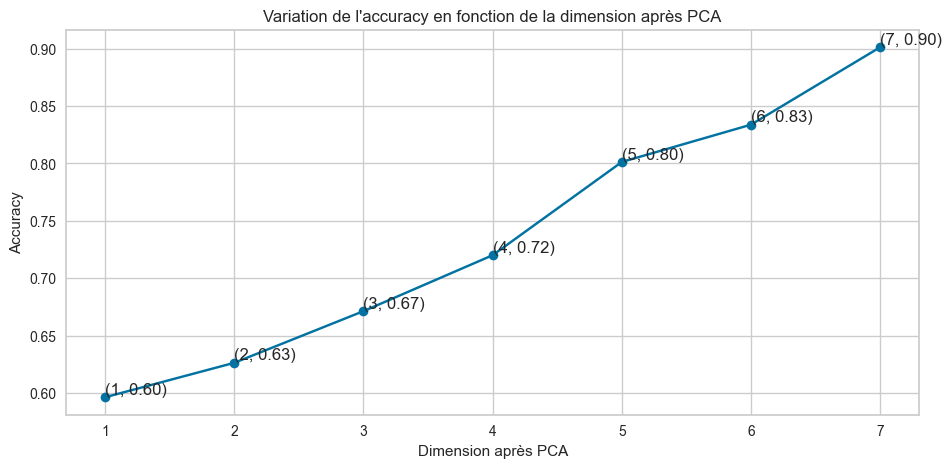

In [141]:
# Initialisation du modèle de classification KNeighborsClassifier
Classifier_model = KNeighborsClassifier()
evaluate_accuracy_vs_dimensions(X, y ,0.20,X.shape[1], Classifier_model)

<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">
<h3 align="left"><font color=brown> 🔍 Conclusion :</font></h3>
    <p>
        L'analyse de la Variation du score accuracy en fonction de la dimension après PCA nous montre que :
        <ul>
            <li> L'accuracy augmente à mesure que le nombre de composantes PCA utilisées augmente, atteignant sa valeur maximale lorsque le nombre de composantes est égal à 7.</li>
        </ul>
    </p>
</div>




## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Data Modeling - K means clustering </div>

In [142]:
from sklearn.metrics import classification_report, accuracy_score, silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [143]:
def apply_kmeans(X_kmeans, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_kmeans)
    X_kmeans['cluster'] = clusters
    return X_kmeans

def visualize_cluster(column1, column2, target, data, cluster_values):
    plt.figure(figsize=(15, 6))

    # Visualisation du dataset avant l'application de K-means
    plt.subplot(1, len(cluster_values) + 1, 1)
    sns.scatterplot(x=column1, y=column2, hue=target, data=data, palette='Set1')
    plt.title('Dataset avant K-means')
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.legend(title=target)
    plt.grid(True)

    for i, n_clusters in enumerate(cluster_values):
        # Application de K-means
        X_kmeans = data[[column1, column2]].copy()
        X_kmeans_result = apply_kmeans(X_kmeans, n_clusters)

        # Visualisation du dataset après K-means
        plt.subplot(1, len(cluster_values) + 1, i + 2)
        sns.scatterplot(x=column1, y=column2, hue='cluster', data=X_kmeans_result, palette='Set1')
        plt.title(f'Dataset après K-means avec {n_clusters} clusters')
        plt.xlabel(column1)
        plt.ylabel(column2)
        plt.legend(title='Cluster')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

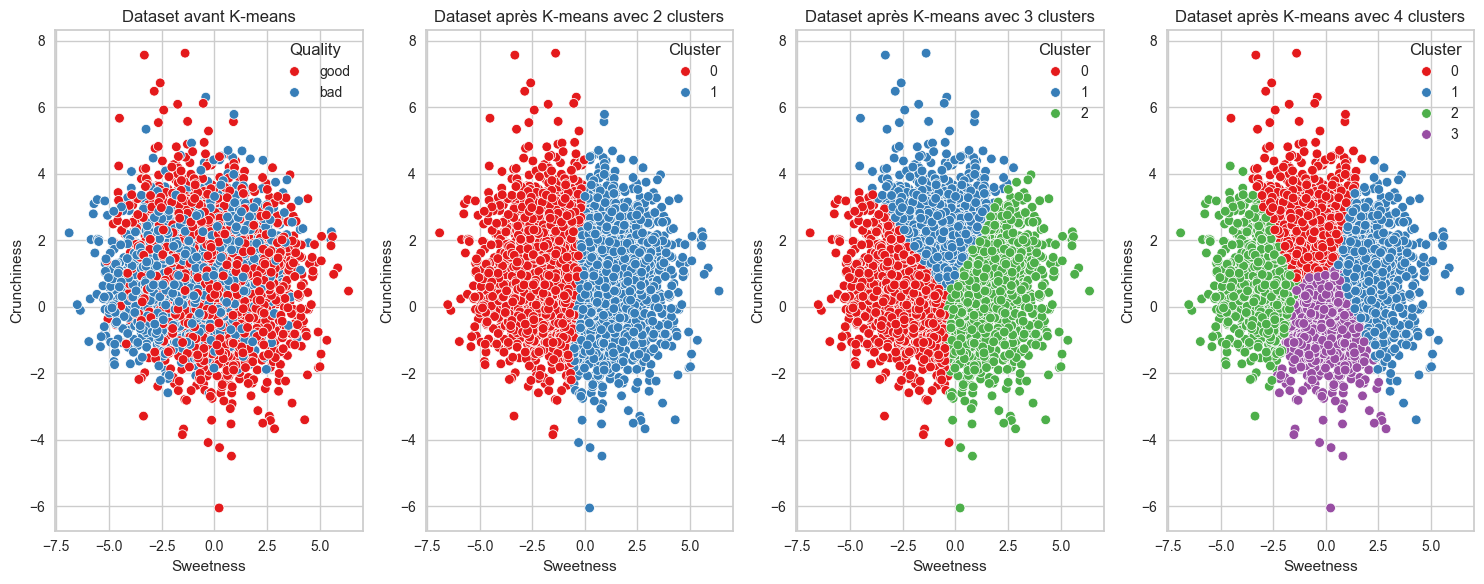

In [151]:
cluster_values = [2, 3, 4]
visualize_cluster('Sweetness', 'Crunchiness', 'Quality', data_clean.copy(), cluster_values)


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Conclusion:</font></h3>
    
* Avant l'application de l'algorithme K-Means, les données des classes "good" et "bad" étaient largement dispersées dans le plan, ce qui rendait toute distinction claire entre les deux groupes pratiquement impossible. Cependant, une fois l'algorithme appliqué avec un nombre de clusters n=2, une séparation nette et sans ambiguïté entre ces deux classes émerge. En augmentant le nombre de clusters à n=3 ou 4, cette séparation se renforce davantage, révélant ainsi une organisation distincte des données en groupes discernables.


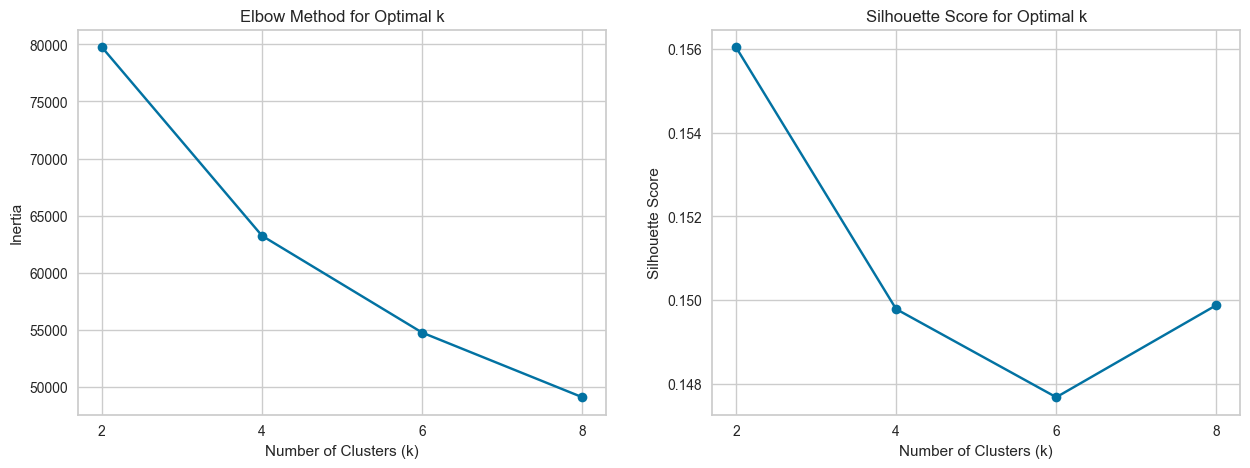

In [145]:
def evaluate_kmeans(X, k_range):
    inertias = []
    silhouette_scores = []
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
        if k > 1:  # Silhouette score is undefined for k=1
            silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    
    # Plotting both curves in the same figure
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    
    # Elbow curve on the left
    axs[0].plot(k_range, inertias, marker='o')
    axs[0].set_title('Elbow Method for Optimal k')
    axs[0].set_xlabel('Number of Clusters (k)')
    axs[0].set_ylabel('Inertia')
    axs[0].set_xticks(k_range)
    axs[0].grid(True)
    
    # Silhouette score curve on the right
    if silhouette_scores:
        axs[1].plot(k_range[:len(silhouette_scores)], silhouette_scores, marker='o')
        axs[1].set_title('Silhouette Score for Optimal k')
        axs[1].set_xlabel('Number of Clusters (k)')
        axs[1].set_ylabel('Silhouette Score')
        axs[1].set_xticks(k_range)
        axs[1].grid(True)
    
    plt.show()
        
# Exemple d'utilisation avec deux colonnes spécifiées et une plage de valeurs de k
X_kmeans = X.copy()  # Remplacez 'data' par le nom de votre DataFrame
k_range = range(2, 10, 2)  # Plage de valeurs de k à évaluer
evaluate_kmeans(X_kmeans, k_range)


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">
<h3 align="left"><font color=brown> 🔍 Conclusion :</font></h3>
    <ul>
        <li> Après avoir examiné les résultats de la méthode du coude (elbow) qui indique une valeur optimale de <mark><b>4 clusters</b></mark>, nous constatons cependant qu'un score de silhouette donne une valeur de <mark><b>2 clusters</b></mark>. Cela correspond parfaitement aux deux classes présentes dans notre jeu de données initial. En conclusion, le score de silhouette apparaît comme la métrique la plus appropriée dans ce cas, nous guidant ainsi vers un choix de <mark><b>k plus réaliste pour notre ensemble de données</b></mark>.</li>
        <ul>
        </ul>
    </ul>
</div>


## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Optimising The K-Nearest Neighbors model </div>

### 1.1 - Plot the accuracy of K-Nearest Neighbors for different values of k

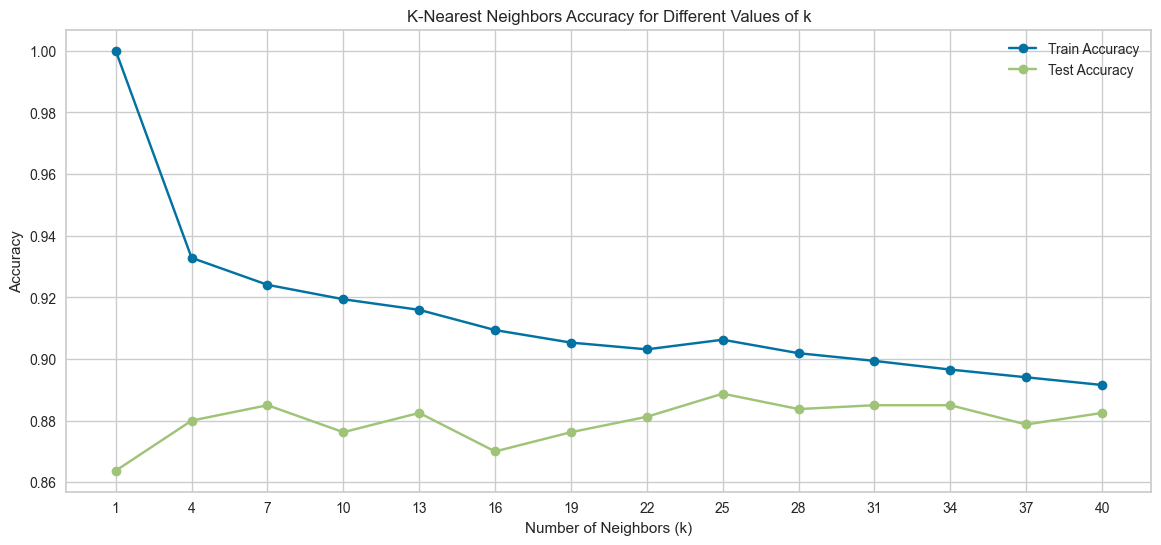

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def plot_knn_accuracy(X_train, y_train, X_test, y_test, max_k=10):
    """
    Plot the accuracy of K-Nearest Neighbors for different values of k.

    Parameters:
    - X_train: Features for training.
    - y_train: Target variable for training.
    - X_test: Features for testing.
    - y_test: Target variable for testing.
    - max_k: Maximum value of k to plot (default is 10).

    Returns:
    - None (displays a plot).
    """

    k_values = range(1, max_k+1, 3)
    train_accuracies = []
    test_accuracies = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        train_pred = knn.predict(X_train)
        train_accuracy = accuracy_score(y_train, train_pred)
        train_accuracies.append(train_accuracy)

        test_pred = knn.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_pred)
        test_accuracies.append(test_accuracy)

    plt.figure(figsize=(14, 6))
    plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o')
    plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='o')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.title('K-Nearest Neighbors Accuracy for Different Values of k')
    plt.xticks(k_values)
    plt.legend()
    plt.grid(True)
    plt.show()

# Utilisation de la fonction avec vos données X_train et X_test
# Supposons que vous ayez déjà défini X_train, y_train, X_test, y_test

plot_knn_accuracy(X_train, y_train, X_test, y_test, max_k=40)


### 1.2 - Optimize the K-Nearest Neighbors algorithm using GridSearchCV and cross-validation.

In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

def optimize_knn(X_train, y_train, K_folders = 5, cv_strategy='stratified'):
    """
    Optimize the K-Nearest Neighbors algorithm using GridSearchCV and cross-validation.

    Parameters:
    - X_train: Features for training.
    - y_train: Target variable for training.

    Returns:
    - best_knn: Optimized K-Nearest Neighbors model.
    """

    # Paramètres à tester
    param_grid = {
        'n_neighbors': [2, 5, 7, 10, 15],  # Nombre de voisins à tester
        'weights': ['uniform', 'distance'],  # Méthode de pondération des voisins
        'metric': ['euclidean', 'manhattan'],  # Mesure de distance
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
    }

    # Définition de la stratégie de validation croisée
    if cv_strategy == 'stratified':
        cross_val = StratifiedKFold(n_splits=K_folders, shuffle=True, random_state=42)
    elif cv_strategy == 'shuffle_split':
        cross_val = ShuffleSplit(n_splits=K_folders, test_size=0.10, random_state=42)
    else:
        raise ValueError("La stratégie de validation croisée doit être 'stratified' ou 'shuffle_split'.")

    # Initialiser le classifieur KNN
    knn = KNeighborsClassifier()

    # Initialiser GridSearchCV
    grid_search = GridSearchCV(knn, param_grid, cv=cross_val, scoring='accuracy')

    # Faire tourner GridSearchCV sur les données d'entraînement
    grid_search.fit(X_train, y_train)

    # Récupérer le meilleur modèle
    best_knn = grid_search.best_estimator_

    # Récupération des résultats
    results = grid_search.cv_results_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Affichage des résultats
    print("Résultats de la recherche sur la grille :")
    print("")

    print("Meilleurs paramètres pour K-Nearest Neighbors:", best_params)
    print("")

    print("Meilleure précision (accuracy) avec GridSearchCV: ", best_score)
    print("")

    # Retourner le meilleur modèle
    return grid_search


### 1.3 - Resultat après l'optimisation de KNeighborsClassifier.

Résultats de la recherche sur la grille :

Meilleurs paramètres pour K-Nearest Neighbors: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}

Meilleure précision (accuracy) avec GridSearchCV:  0.8978124999999999

accuracy_score(comportement du modèle avec de nouvelles données) : 88.2500% de score de accuracy
Score F1_macro (comportement du modèle avec de nouvelles données) : 0.8824970624265607
              precision    recall  f1-score   support

         bad       0.88      0.89      0.88       399
        good       0.89      0.88      0.88       401

    accuracy                           0.88       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.88      0.88       800



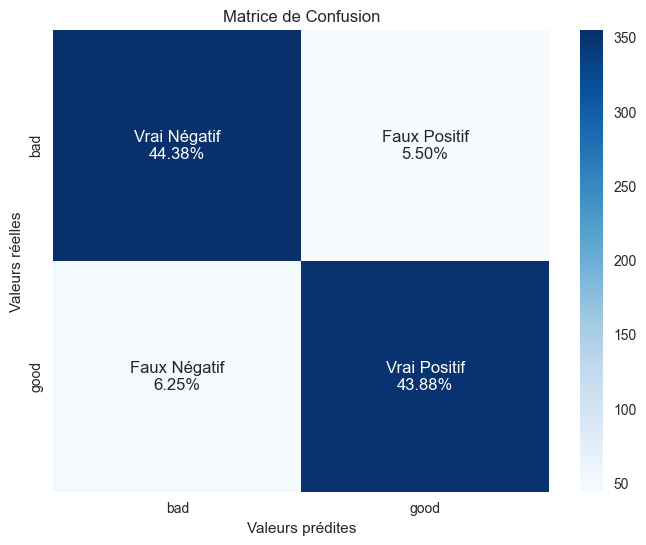

In [148]:
grid_search = optimize_knn(X_train, y_train, 5, 'stratified')
best_knn_model = grid_search.best_estimator_
best_params_knn = grid_search.best_params_
y_pred = best_knn_model.predict(X_test)

#accuracy = round(accuracy_score(y_test, y_pred),4)
#print("Accuracy du meilleur modèle KNN sur de nouvelle donnée:", accuracy)

# Calcul du score accuracy
accuracy = round(accuracy_score(y_test, y_pred), 4)
print(f"accuracy_score(comportement du modèle avec de nouvelles données) : {accuracy_score(y_test, y_pred) * 100:.4f}% de score de accuracy")

# Calcul du score F1_macro
F1_macro = f1_score(y_test, y_pred, average='macro')
print(f"Score F1_macro (comportement du modèle avec de nouvelles données) : {F1_macro}")

# Print classification report and accuracy for the test dataset
print(classification_report(y_test, y_pred))

# Matrice de confusion
cf_matrix = confusion_matrix(y_test, y_pred)
categories = np.unique(y_test)  # Nombre de classes uniques dans les vrais labels
group_names = ['Vrai Négatif', 'Faux Positif', 'Faux Négatif', 'Vrai Positif']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(len(categories), len(categories))

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")
plt.title("Matrice de Confusion")
plt.show()

## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Optimisation des hyperparamètres pour ExtraTreesClassifier avec GridSearchCV </div> 

In [149]:
# Définition du modèle ExtraTreesClassifier
extra_trees = ExtraTreesClassifier(random_state=42)

# Définition de la grille des hyperparamètres à rechercher
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Création de l'objet GridSearchCV
grid_search = GridSearchCV(extra_trees, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entraînement du GridSearchCV sur les données d'entraînement
grid_search.fit(X_train, y_train.values.ravel())

# Meilleurs paramètres trouvés par GridSearchCV
best_params = grid_search.best_params_
best_params_extra_trees = grid_search.best_params_
print("Meilleurs paramètres pour ExtraTreesClassifier:", best_params)

# Meilleur score d'accuracy obtenu par GridSearchCV
best_accuracy = grid_search.best_score_
print("Meilleur score d'accuracy avec GridSearchCV:", best_accuracy)

# Entraînement du modèle ExtraTreesClassifier avec les meilleurs paramètres trouvés
best_extra_trees = ExtraTreesClassifier(**best_params, random_state=42)
best_extra_trees.fit(X_train, y_train.values.ravel())

# Prédiction sur les données de test
y_pred_best = best_extra_trees.predict(X_test)

# Évaluation du modèle avec les meilleurs paramètres
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_macro_best = f1_score(y_test, y_pred_best, average='macro')

print("Accuracy du meilleur ExtraTreesClassifier:", accuracy_best)
print("F1 Macro du meilleur ExtraTreesClassifier:", f1_macro_best)


Meilleurs paramètres pour ExtraTreesClassifier: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Meilleur score d'accuracy avec GridSearchCV: 0.8959374999999999
Accuracy du meilleur ExtraTreesClassifier: 0.87625
F1 Macro du meilleur ExtraTreesClassifier: 0.8762451658267901


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Optimisation des hyperparamètres pour XGBClassifier avec GridSearchCV </div> 

In [150]:
# Création du XGBClassifier
xgb_classifier = XGBClassifier()

# Définition des hyperparamètres à rechercher
param_grid = {
    'n_estimators': [100, 250, 350, 400],
    'learning_rate': [0.001, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    #'subsample': [0.6, 0.8, 1.0],
    #'colsample_bytree': [0.6, 0.8, 1.0],
    #'gamma': [0, 0.1, 0.2],
    #'reg_alpha': [0, 0.1, 0.2],
    #'reg_lambda': [0, 0.1, 0.2]
}

# Création de l'objet GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1)

# Entraînement avec GridSearchCV
grid_search.fit(X_train, y_train_encoded)  #y_train_encoded, y_test_encoded,

# Meilleurs paramètres trouvés
best_params = grid_search.best_params_
best_params_xgb_classifier = grid_search.best_params_
print("Meilleurs paramètres pour XGBClassifier:", best_params)

# Meilleur score
best_score = grid_search.best_score_
print("Meilleur score avec GridSearchCV:", best_score)

# Utilisation du meilleur modèle
best_xgb_classifier = grid_search.best_estimator_

# Prédiction avec le meilleur modèle
y_pred_xgb = best_xgb_classifier.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test_encoded, y_pred_xgb)
print("Accuracy du XGBClassifier optimisé :", accuracy)
# Calcul du F1 score macro
f1_macro = f1_score(y_test_encoded, y_pred_xgb, average='macro')
print("F1 score macro du XGBClassifier optimisé :", f1_macro)

Meilleurs paramètres pour XGBClassifier: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 400}
Meilleur score avec GridSearchCV: 0.8934374999999999
Accuracy du XGBClassifier optimisé : 0.8825
F1 score macro du XGBClassifier optimisé : 0.8824970624265607


## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> VotingClassifier </div>

## Voting Classifier

Le Voting Classifier est une technique d'ensemble (ensemble learning) en apprentissage automatique où plusieurs modèles sont combinés pour obtenir des prédictions plus robustes et précises. 

### Types de Voting :

Il existe deux principaux types de Voting dans un Voting Classifier :

- **Hard Voting** : Dans ce type, chaque modèle de sous-classification donne une seule prédiction (le vote "dur") et la classe prédite est déterminée par le vote majoritaire parmi tous les modèles.
  
- **Soft Voting** : Dans ce type, chaque modèle de sous-classification donne une probabilité pour chaque classe (le vote "doux") et la classe prédite est déterminée par la moyenne pondérée des probabilités de tous les modèles.

### Avantages du Voting Classifier :

- **Amélioration de la performance** : Le Voting Classifier combine les forces de plusieurs modèles, ce qui peut conduire à une meilleure performance globale.
  
- **Robustesse** : En combinant différents types de modèles, le Voting Classifier peut être plus robuste aux erreurs de modélisation individuelles.

### Illustration du Voting Classifier :

<!-- Redimensionner l'image à une largeur de 500 pixels et une hauteur de 300 pixels -->
<img src="the-voting-classifier.png" alt="Illustration du Voting Classifier" width="700" height="400">

Dans l'image ci-dessus, nous voyons un exemple visuel du fonctionnement du Voting Classifier. Chaque modèle de sous-classification (représenté par les boîtes grises) donne une prédiction, et ensuite, selon le type de Voting (dur ou doux), les votes sont combinés pour produire une prédiction finale (représentée par la flèche verte).

Le Voting Classifier est un outil puissant en machine learning, permettant de combiner intelligemment les prédictions de plusieurs modèles pour obtenir des résultats plus fiables et précis.


In [166]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

# Création des modèles avec les meilleurs paramètres
model1 = ExtraTreesClassifier(**best_params_extra_trees)
model2 = KNeighborsClassifier(**best_params_knn)
model3 = XGBClassifier(**best_params_xgb_classifier)

# Création du VotingClassifier avec voting='soft'
voting_soft = VotingClassifier(estimators=[('et', model1), ('knn', model2), ('xgb', model3)], voting='soft')
voting_soft.fit(X_train, y_train)

# Prédictions avec voting='soft'
y_pred_soft = voting_soft.predict(X_test)

# Calcul des métriques avec voting='soft'
accuracy_soft = accuracy_score(y_test, y_pred_soft)
f1_macro_soft = f1_score(y_test, y_pred_soft, average='macro')

# Création du VotingClassifier avec voting='hard'
voting_hard = VotingClassifier(estimators=[('et', model1), ('knn', model2), ('xgb', model3)], voting='hard')
voting_hard.fit(X_train, y_train)

# Prédictions avec voting='hard'
y_pred_hard = voting_hard.predict(X_test)

# Calcul des métriques avec voting='hard'
accuracy_hard = accuracy_score(y_test, y_pred_hard)
f1_macro_hard = f1_score(y_test, y_pred_hard, average='macro')

# Affichage des résultats
print("Accuracy du VotingClassifier avec voting='soft' :", accuracy_soft)
print("F1 Macro du VotingClassifier avec voting='soft' :", f1_macro_soft)
print()
print("Accuracy du VotingClassifier avec voting='hard':", accuracy_hard)
print("F1 Macro du VotingClassifier avec voting='hard':", f1_macro_hard)


Accuracy du VotingClassifier avec voting='soft' : 0.88125
F1 Macro du VotingClassifier avec voting='soft' : 0.8812186342956188

Accuracy du VotingClassifier avec voting='hard': 0.88375
F1 Macro du VotingClassifier avec voting='hard': 0.8837454588069846


### Performance du VotingClassifier

#### Soft Voting

- **Accuracy :** 88.125%
- **F1 Macro :** 88.122%

Le VotingClassifier avec un mode de vote 'soft' a une précision (accuracy) de 88.125% et une F1 Macro de 88.122%. Cela suggère une performance solide du modèle en utilisant le mode de vote 'soft', indiquant une bonne capacité à généraliser sur de nouvelles données. Le mode de vote 'soft' est souvent efficace lorsque les modèles de base ont des sorties de probabilité intermédiaires intéressantes à combiner.

#### Hard Voting

- **Accuracy :** 88.375%
- **F1 Macro :** 88.375%

Le VotingClassifier avec un mode de vote 'hard' présente une précision (accuracy) de 88.375% et une F1 Macro de 88.375%. Ces performances sont légèrement supérieures à celles du mode 'soft', ce qui indique que le mode de vote 'hard' peut mieux fonctionner dans ce cas particulier. Le mode de vote 'hard' prend simplement la décision de la majorité, ce qui peut être avantageux lorsque les modèles de base ont des performances similaires.

Globalement, les deux modes de vote montrent des performances très proches. Cela suggère que les modèles individuels (ExtraTreesClassifier, KNeighborsClassifier et XGBClassifier) ont des performances comparables sur cet ensemble de données, ce qui conduit à des performances de VotingClassifier similaires pour les deux modes de vote.

Ces résultats indiquent que votre modèle de VotingClassifier est capable de bien généraliser sur de nouvelles données, avec une précision et une F1 Macro solides, que ce soit en utilisant le mode de vote 'soft' ou 'hard'. Vous pouvez être confiant dans l'utilisation de ce modèle pour vos tâches de classification.


## Sources utilisées dans le projet :

### Pour le Voting Classifier :
- [Ensemble Modeling: Voting](https://michael-fuchs-python.netlify.app/2020/05/05/ensemble-modeling-voting/) par Michael Fuchs
- [Ensemble Voting Classifiers and Random Forests in Sci-kit Learn](https://medium.com/analytics-vidhya/ensemble-voting-classifiers-and-random-forests-in-sci-kit-learn-ed0ee6a81a12) par Analytics Vidhya
- [Hard vs Soft Voting Classifier Python Example](https://vitalflux.com/hard-vs-soft-voting-classifier-python-example/) par Vitalflux
- [What is Hard and Soft Voting in Machine Learning?](https://ilyasbinsalih.medium.com/what-is-hard-and-soft-voting-in-machine-learning-2652676b6a32) par Ilyas Bin Salih
- [Heterogeneous Ensemble Learning: Hard Voting & Soft Voting](https://www.datajango.com/heterogeneous-ensemble-learning-hard-voting-soft-voting/) par DataJango

### Pour le Splitting and Cross-validation :
- [Splitting and Cross-validation](https://bait509-ubc.github.io/BAIT509/lectures/lecture2.html) par BAIT509-UBC
